# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [583]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

## Task 1 
The dataset contains **1500 rows** and **8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:
- booking_id: Should be categorical data type due to instruction in the description. So, i convert it into category data type.
- months_as_member:same as description without missing value. 
- weight: 20 missing value. So, i replace it with the average of weight column.
- days_before: Should be integer data type due to instruction in the description, and there is some inconsistent value such 10 days, 14 days, etc. So, i remove days and convert this column into integer data type. 
- day_of_week: Should be categorical data type, and there is some inconsistent value such Fri. , Wednesday, Monday. So, i replace it with Fri, Wed, and Mon. Then, i convert it into category data type. 
- time: Should be categorical data type due to instruction in the description. So, i convert it into category data type.
- category: Should be categorical data type, and there is some inconsistent value '-'.  So, i replace it with 'unknown' and convert it into category data type.
- attended: Should be categorical data type due to instruction in the description. So, i convert it into category data type.

**Original Dataset**

In [584]:
#load data
fitness = pd.read_csv("fitness_class_2212.csv")
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


**Validate The Numerical Variable**

In [585]:
fitness.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


**Validate The Categorical Variable**

In [586]:
category = ['days_before', 'day_of_week', 'time', 'category']
for cat in category:
    print(cat + ':')
    print(fitness[cat].value_counts())
    print()

days_before:
10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64

day_of_week:
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

time:
AM    1141
PM     359
Name: time, dtype: int64

category:
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64



**Check Missing Value for Every Column**

In [587]:
fitness.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

**Clean booking_id, days_before, and attended**

In [588]:
fitness['booking_id'] = fitness['booking_id'].astype('category')
fitness['days_before'] = fitness['days_before'].str.replace(' days', '').astype('int64')
fitness['attended'] = fitness['attended'].astype('category')

**Clean weight**

In [589]:
fitness['weight'] = fitness['weight'].fillna(fitness['weight'].mean())

**Clean day_of_week, time, category**

In [590]:
fitness = fitness.replace({'day_of_week':{'Wednesday':'Wed', 'Fri.':'Fri', 'Monday':'Mon'}})
fitness['day_of_week'] = fitness['day_of_week'].astype('category')
fitness['time'] = fitness['time'].astype('category')
fitness['category'] = fitness['category'].str.replace('-', 'unknown').astype('category')

**Validate Clean dataframe**

In [591]:
print(fitness.info())
print(fitness.describe())
category = ['booking_id', 'day_of_week', 'time', 'category', 'attended']
for cat in category:
    print(cat + ':')
    print(fitness[cat].value_counts())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   category
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(5), float64(1), int64(2)
memory usage: 88.9 KB
None
       months_as_member       weight  days_before
count       1500.000000  1500.000000  1500.000000
mean          15.628667    82.610378     8.346667
std           12.926543    12.680411     4.077938
min            1.000000    55.410000     1.000000
25%            8.000000    73.562500     4.000000
50%           12.000000    81.035000     9.00

## Task 2
- From **Graphs 1 and 2** it can be seen that the HIIT category has the most observations with a percentage of nearly 50% among those present. 
- We can see from **Graph 1** that, each category has different observations. So, this observations is unbalance. 

**Check number of attended or not in every category class**

In [592]:
print(fitness[fitness['attended'] == 1]['category'].value_counts())

HIIT        213
Cycling     110
Strength     62
Yoga         42
Aqua         25
unknown       2
Name: category, dtype: int64


**Visualize class attended distribution**

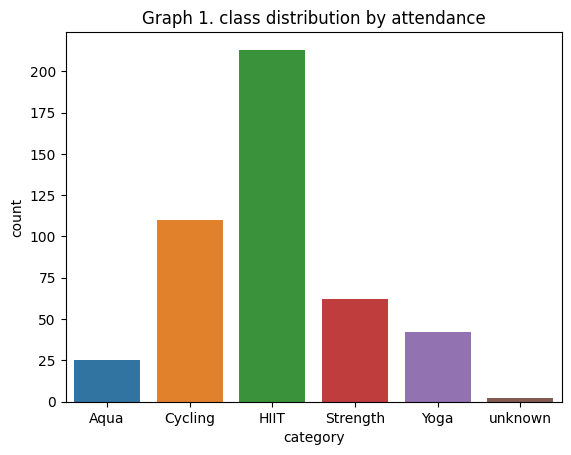

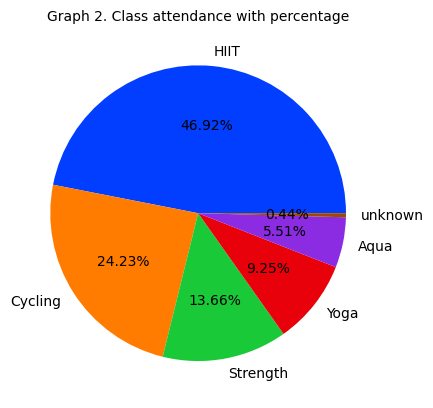

In [593]:
fitness_attended = fitness[fitness['attended'] == 1]
sns.countplot(x = 'category', data = fitness_attended).set(title = 'Graph 1. class distribution by attendance')
plt.show()
plt.clf()
palette_color = sns.color_palette('bright')
data_1 = [213, 110, 62, 42, 25, 2]
category = ['HIIT', 'Cycling', 'Strength', 'Yoga', 'Aqua', 'unknown']
plt.pie(data_1, labels=category, colors=palette_color, autopct='%.2f%%')
plt.title('Graph 2. Class attendance with percentage', fontsize = 10)
plt.show()

## Task 3
From **Graph 3-1**, This graph shows a right skewed distribution, with most observations showing membership of less than 30 months. And I can see an outlier, larger than 140. Since I don't have a lot of data, I decided to apply a log transformation. From **Graph 3-2**, I can see the distribution is much closer to a normal distribution.

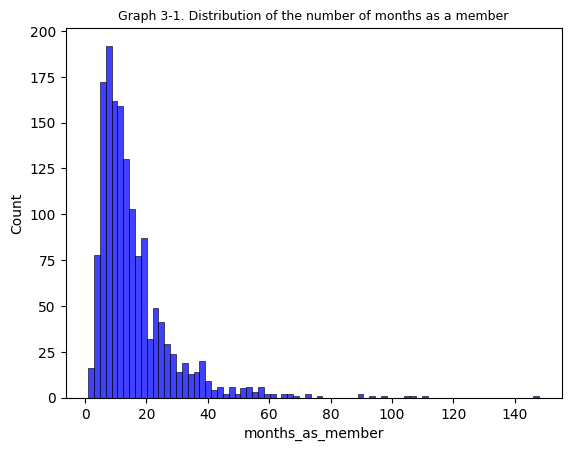

In [594]:
sns.histplot(x = fitness['months_as_member'], color = 'b').set_title('Graph 3-1. Distribution of the number of months as a member', fontsize = 9)
plt.show()

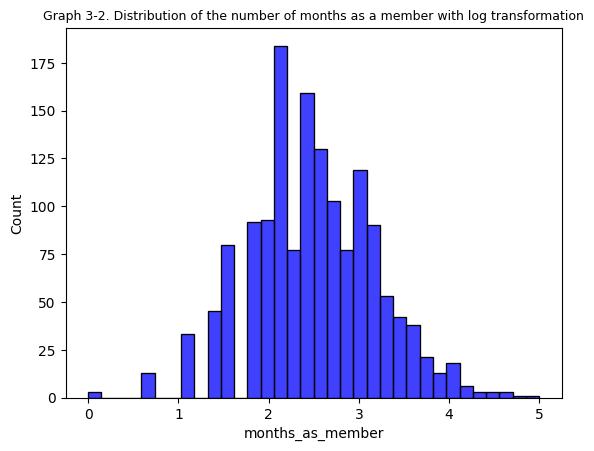

In [595]:
sns.histplot(x = np.log(fitness['months_as_member']), color = 'b').set_title('Graph 3-2. Distribution of the number of months as a member with log transformation', fontsize = 9)
plt.show()

## Task 4
From **Graph 4**, most of those who did not attend were those with memberships  less than 25 months. While most of those who attended were those with membership more than 25 months.

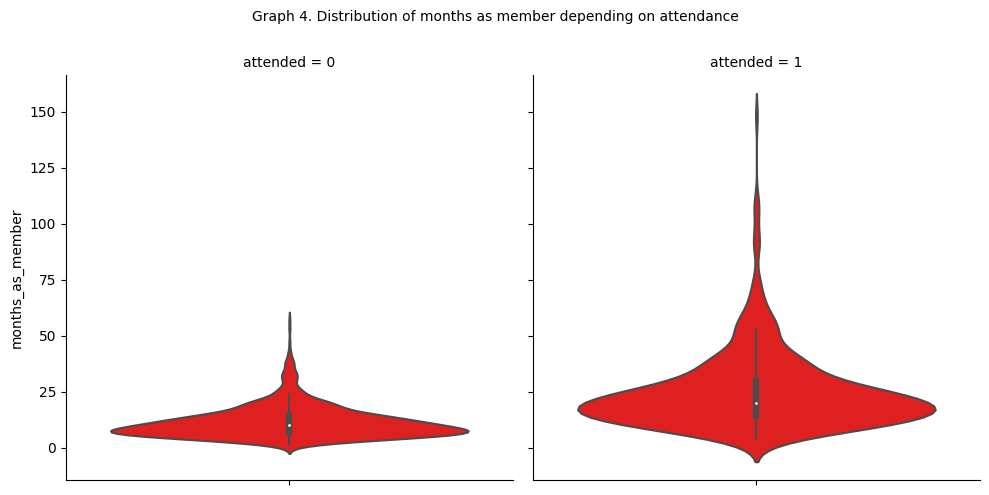

In [596]:
ax = sns.catplot(data = fitness, kind = 'violin', y = 'months_as_member', col = 'attended', color = 'red')
ax.fig.subplots_adjust(top=0.85)
ax.fig.suptitle('Graph 4. Distribution of months as member depending on attendance', fontsize = 10)
plt.show()

In [597]:
features = fitness.drop('booking_id', axis = 1)
features[['day_of_week', 'time']] = features[['day_of_week', 'time']].apply(LabelEncoder().fit_transform)
cat = pd.get_dummies(features['category'])
features.drop(['category'], axis = 1, inplace = True)
features = pd.concat([cat, features], axis = 1)
features['log_weight'] = np.log(features['weight'])
features['log_months_as_member'] = np.log(features['months_as_member'])
features['log_days_before'] = np.log(features['days_before'])
features.drop(['weight', 'months_as_member', 'days_before'], axis = 1, inplace = True)
features

,Aqua,Cycling,HIIT,Strength,Yoga,unknown,day_of_week,time,attended,log_weight,log_months_as_member,log_days_before
0,0,0,0,1,0,0,6,1,0,4.376511,2.833213,2.079442
1,0,0,1,0,0,0,1,0,0,4.369574,2.302585,0.693147
2,0,0,0,1,0,0,3,0,0,4.311202,2.772589,2.639057
3,0,1,0,0,0,0,0,0,0,4.455742,1.609438,2.302585
4,0,0,1,0,0,0,4,0,0,4.238301,2.708050,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,1,0,0,0,0,0,0,4.375883,3.044522,2.302585
1496,0,0,0,1,0,0,1,0,0,4.494797,3.367296,0.693147
1497,0,0,1,0,0,0,5,0,0,4.470266,2.197225,1.386294
1498,1,0,0,0,0,0,3,0,0,4.228875,3.526361,2.639057


## Task 5
The machine learning model that suitable for predicting member attend is **classification**, because attended data type from fitness dataframe is category, with 0 for not attend, and 1 for attend. 

To enable model fitting, i have made the following changes:
- Drop the booking_id column because it has unique values. 
- Convert all ordinal feature (day_of_week and time) with label encoding or ordinal encoding. Because in ordinal data, one should retain the information regarding the order in which the category is provided. 
- Convert all nominal feature (category) with one hot encoding. Because in nominal data, we have to consider the presence or absence of a feature. 
- Rescale weight, months_as_member, and days_before column with log transformation. Because those columns have a skewed distribution so it needs to be changed to approach the normal distribution for the quality improvement model. 
- Drop the original weight, months_as_member column, and days_before. 

In [598]:
features = fitness.drop('booking_id', axis = 1)
features[['day_of_week', 'time']] = features[['day_of_week', 'time']].apply(LabelEncoder().fit_transform)
cat = pd.get_dummies(features['category'])
features.drop(['category'], axis = 1, inplace = True)
features = pd.concat([cat, features], axis = 1)
features['log_weight'] = np.log(features['weight'])
features['log_months_as_member'] = np.log(features['months_as_member'])
features['log_days_before'] = np.log(features['days_before'])
features.drop(['weight', 'months_as_member', 'days_before'], axis = 1, inplace = True)
features

,Aqua,Cycling,HIIT,Strength,Yoga,unknown,day_of_week,time,attended,log_weight,log_months_as_member,log_days_before
0,0,0,0,1,0,0,6,1,0,4.376511,2.833213,2.079442
1,0,0,1,0,0,0,1,0,0,4.369574,2.302585,0.693147
2,0,0,0,1,0,0,3,0,0,4.311202,2.772589,2.639057
3,0,1,0,0,0,0,0,0,0,4.455742,1.609438,2.302585
4,0,0,1,0,0,0,4,0,0,4.238301,2.708050,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,1,0,0,0,0,0,0,4.375883,3.044522,2.302585
1496,0,0,0,1,0,0,1,0,0,4.494797,3.367296,0.693147
1497,0,0,1,0,0,0,5,0,0,4.470266,2.197225,1.386294
1498,1,0,0,0,0,0,3,0,0,4.228875,3.526361,2.639057


In [599]:
X = features.drop('attended', axis = 1)
y = features['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24, stratify = y)

## Task 6
Baseline model: Logistic Regression

In [600]:
param = {'penalty':['l1', 'l2'], 'C':[100, 10, 1.0, 0.1, 0.01], 'solver':['newton-cg', 'lbfgs', 'liblinear']}
CV_log = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions=param, cv = 5)
CV_log.fit(X_train, y_train)
log_best = LogisticRegression(**CV_log.best_params_)
log_best.fit(X_train, y_train)
y_pred_log = log_best.predict(X_test)

## Task 7
Comparison model: Random Forest Classifier

In [601]:
param = { 
    'n_estimators': [100, 200, 500, 1000],
    'min_samples_split': [5, 10, 20, 50],
    'max_depth' : [5, 10, 12],
    'criterion' :['gini', 'entropy']
}
CV_rfc = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=param, cv = 5)
CV_rfc.fit(X_train, y_train)
rf_best = RandomForestClassifier(**CV_rfc.best_params_)
rf_best.fit(X_train, y_train)
y_pred_rfc = rf_best.predict(X_test)

I am using **RandomizedSearchCV** as a hyperparameter tuning model because it takes less time than the **GridSearchCV**, and also to find the best hyperparameters for both models. 

<AxesSubplot: >

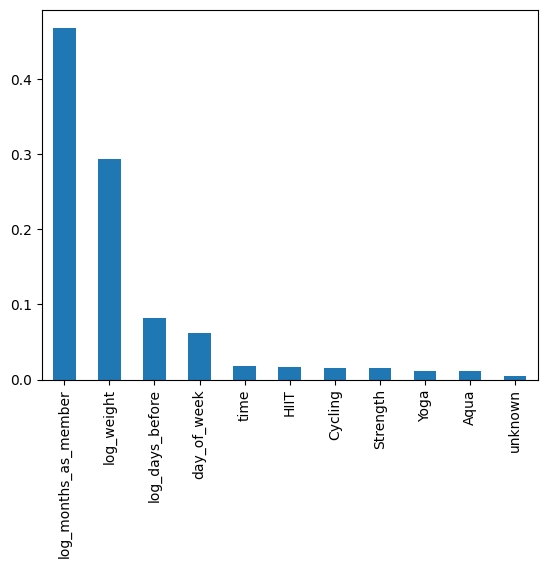

In [602]:
feature_importances = pd.Series(rf_best.feature_importances_, index=X_test.columns).sort_values(ascending=False)
feature_importances.plot.bar()

From the graph taken from the important features random forest, **log_months_as_member** is the most important feature in predicting attendance, then follows by **log_weight** and **log_days_before**. 

## Task 8
I am choosing **Logistic Regression** as a baseline model because it is simple and efficient to train and interpret. And also, **Logistic Regression** predicts data based on an existing formula or the sigmoid function formula with its output range is 0 to 1 or in other words is probability.

I am choosing **Random Forest Classifier** as a comparison model because it can capture more complex relationship between the input features and the target variables. And also **Random Forest Classifier** predicts by dividing the data by adjusting it to the threshold parameters determined by the algorithm itself, with the output of the random forest being 0 or 1

## Task 9
I am choosing **F1 score** and **confusion matrix** to evaluate the model because it is commonly used to evaluate an imbalanced classification model. In this case, data for target value (attended) slightly uneven, as confusion matrix shows that label 0 have around 310 data while label 1 have around 130 data. So therefore, **F1 score** can use to find good balanced between precision and recall to evaluate and imbalanced classification model. 

In [603]:
def confusion_matrix_plot(y_test, prediction):
    conf_matrix = confusion_matrix(y_test, prediction)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()

**Evaluate Logistic Regression**

0.6115702479338843


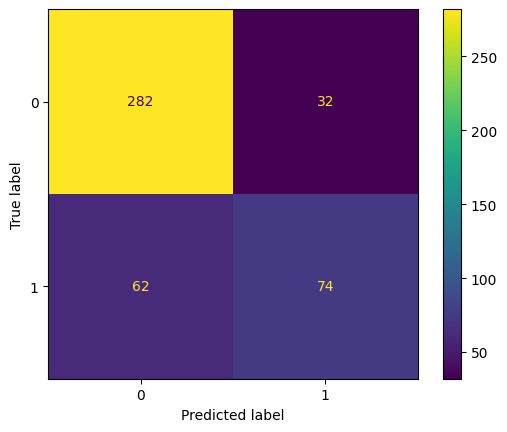

In [604]:
f1_score_logistic = f1_score(y_test, y_pred_log)
print(f1_score_logistic)
confusion_matrix_plot(y_test, y_pred_log)

**Evaluate Random Forest Classifier**

0.5991902834008096


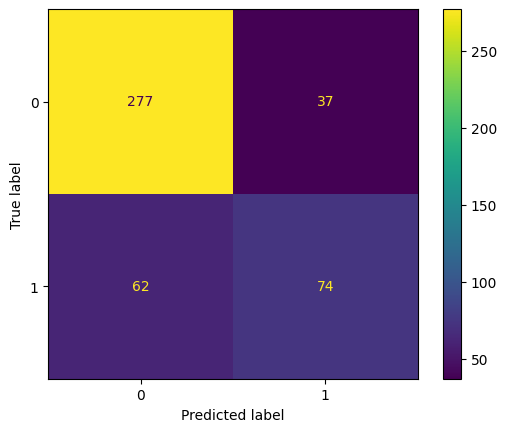

In [605]:
f1_score_rfc = f1_score(y_test, y_pred_rfc)
print(f1_score_rfc)
confusion_matrix_plot(y_test, y_pred_rfc)

## Task 10
A higher **f1 score** indicates the model has **higher precision and recall**. In the other words, the model has **higher ability** to both **capture positive cases** (recall) and **be accurate with the cases it does capture** (precision). 

Therefore, **Logistic Regression** is performing better at predicting class attendance than **Random Forest Classifier**. 

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam